In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
import pickle

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

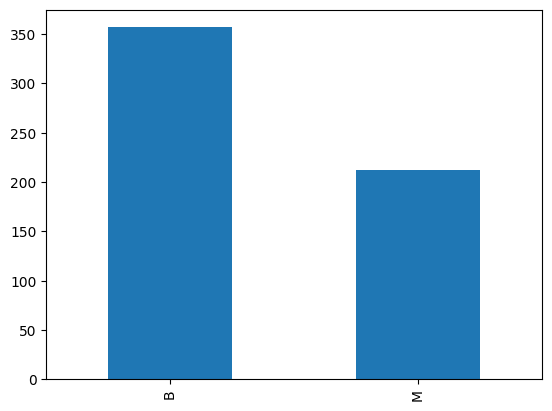

In [ ]:
df['diagnosis'].value_counts().plot.bar()

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
x=df.iloc[:, 2:]
y=df.diagnosis

In [ ]:
scaler = MinMaxScaler ()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
X_train = X_scaled[: 468]
X_test = X_scaled[468:]
y_train_true = y[:468]
y_test_true = y[468:]

In [ ]:
knn = KNeighborsClassifier (n_neighbors=21, weights='distance')
knn.fit(X_train, y_train_true)

KNeighborsClassifier(n_neighbors=21, weights='distance')

In [ ]:
y_test_pred = knn.predict(X_test)
y_test_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B'], dtype=object)

In [ ]:
knn.score(X_test,y_test_true)

0.9801980198019802

In [ ]:
confusion_matrix(y_test_true, y_test_pred)

array([[77,  0],
       [ 2, 22]])

In [ ]:
rate = (confusion_matrix(y_test_true, y_test_pred)[0][0]+confusion_matrix(y_test_true, y_test_pred)[1][1])/(confusion_matrix(y_test_true, y_test_pred)[0][0]+confusion_matrix(y_test_true, y_test_pred)[0][1]+confusion_matrix(y_test_true, y_test_pred)[1][0]+confusion_matrix(y_test_true, y_test_pred)[1][1])

In [ ]:
rate

0.9801980198019802

In [ ]:
pickle.dump(knn, open( 'model.sav','wb')) #para guardar el modelo

In [ ]:
new_model = pickle.load(open('model. sav', 'rb')) # para reutilizar el modelo